# M5 - W1 Assignment: Churn Problem Part 1

In this first week of the new module, we will be using a Churn problem because it is one of the most pressing issues in different industries. We will be using the following data set: https://www.kaggle.com/blastchar/telco-customer-churnLinks to an external site. and we'll be using the same data set for next week as well. So the next assignment will build on this one. 

In this first half, we will explore the dataset a bit using most of what we learnt until now and start preparing everything for implementing and testing our models. 
For this week, consider the following questions. Feel free to answer them via a notebook, where you tell your story using a mix of markdown, code and visualisation. 

Have a quick overview of the features and implement a “cleaning process”. Make sure this part of the code is well organised, if possible make this an object-oriented exercise.

Explain the process that needs to happen for each feature before you train your model. Also, think about how future observations might be different from the ones you have! Be creative. 

E.g: You have a gender column that currently holds the values “Male” and “Female”. Is it possible that I receive an observation with “M” or “F”, if so, how do I plan to take care of this? 

Choose one metric to evaluate the different models you will train and explain why you are choosing that instead of other metrics. You can try a few base models but model performance is not of prime importance yet.  

# PART 1 : CLEANING PROCESS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


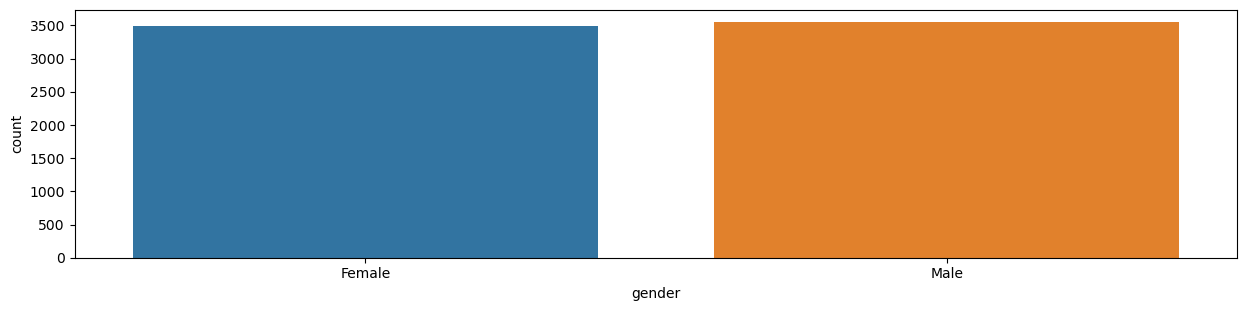

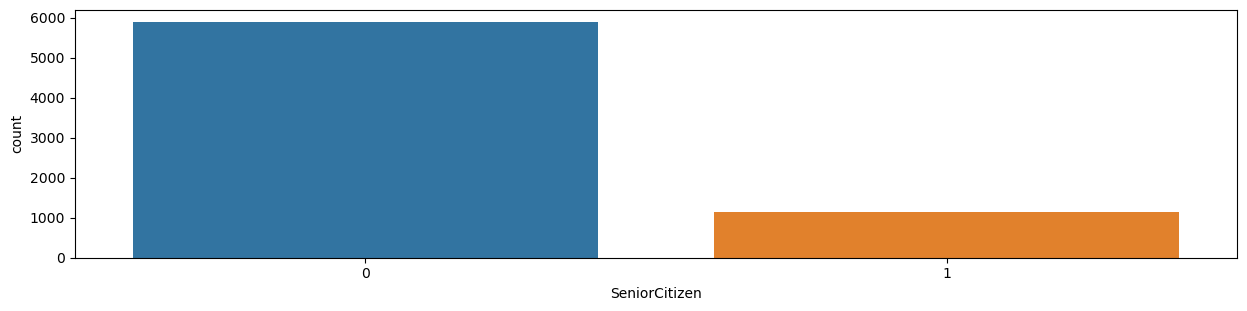

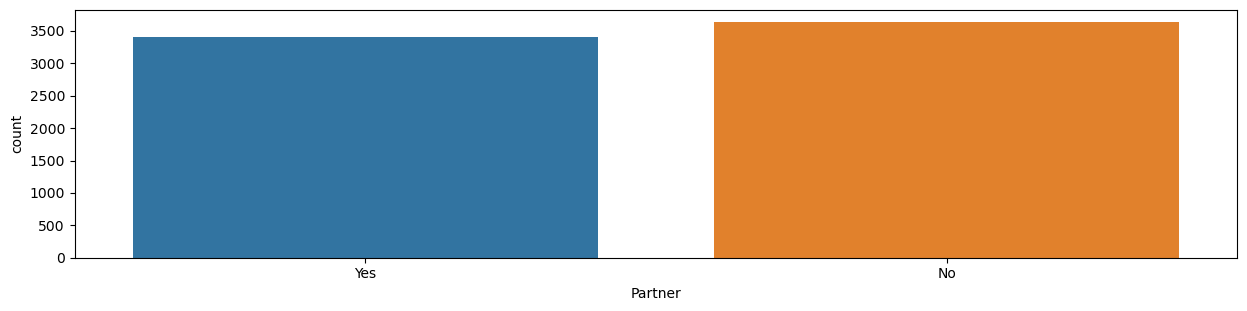

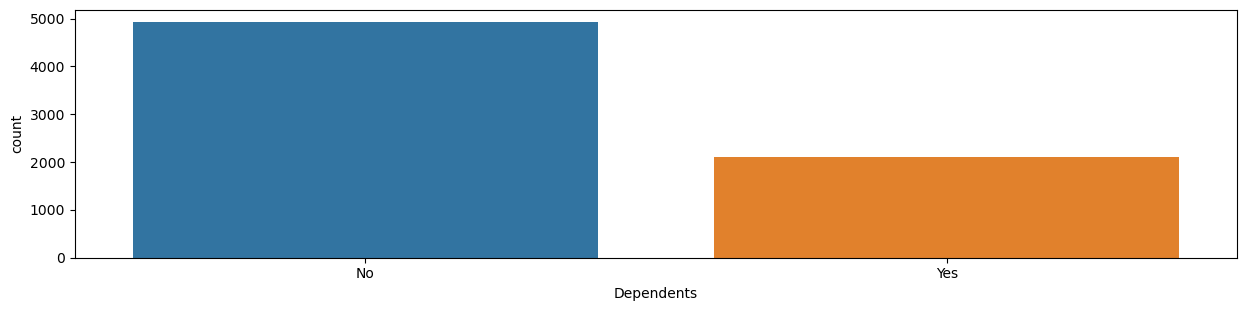

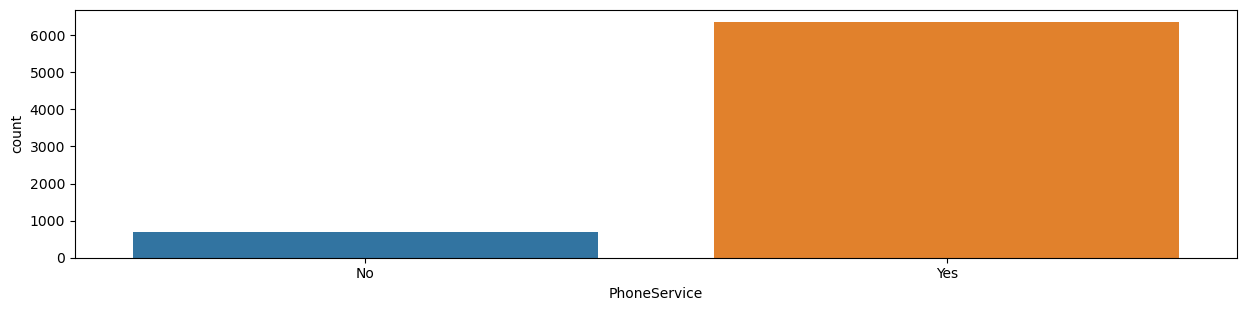

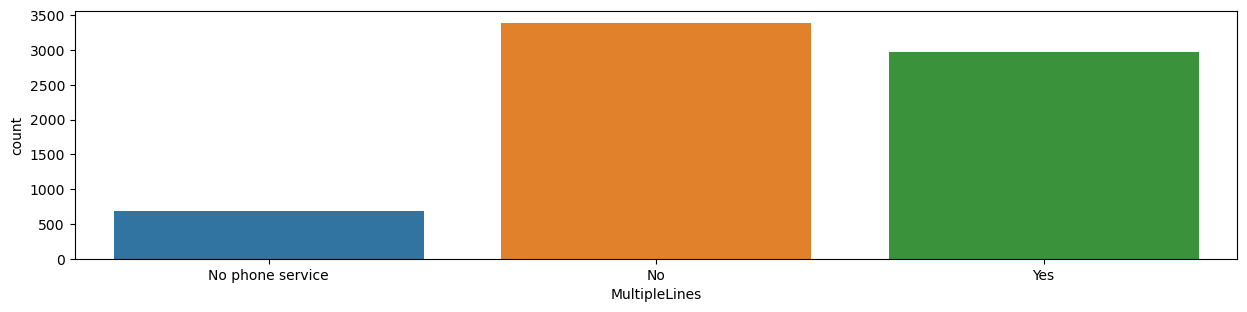

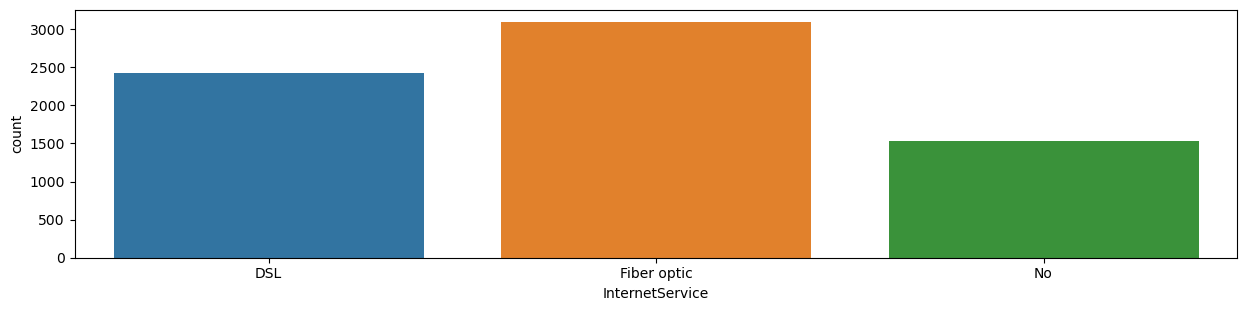

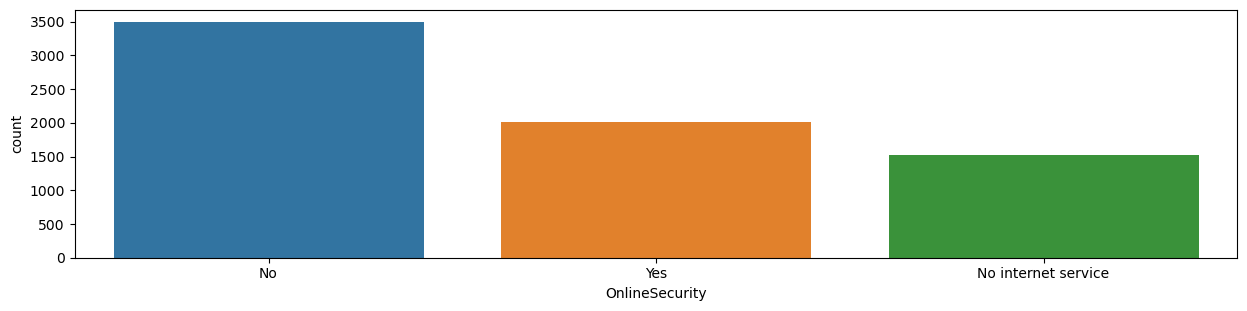

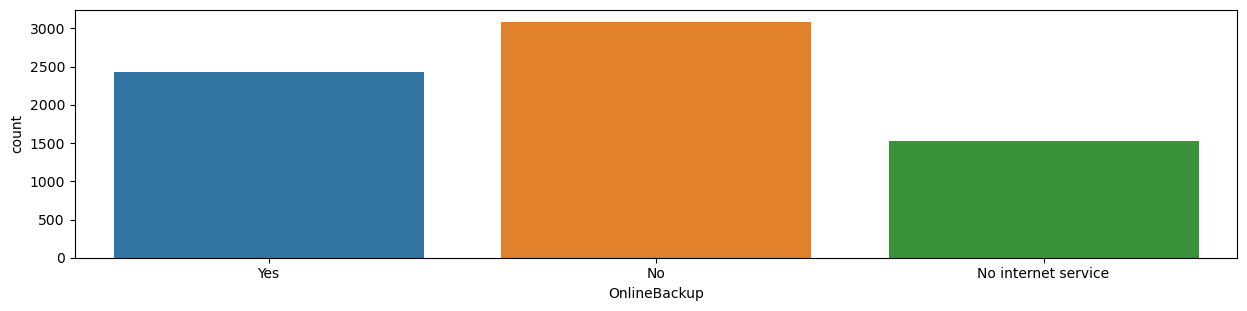

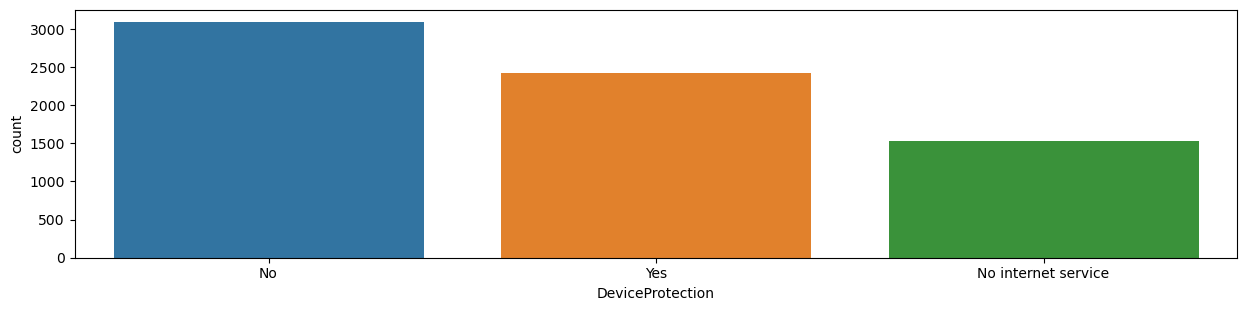

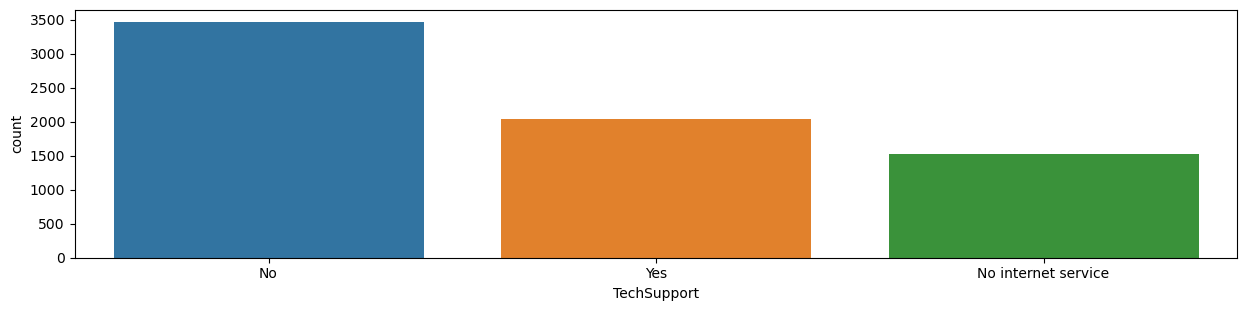

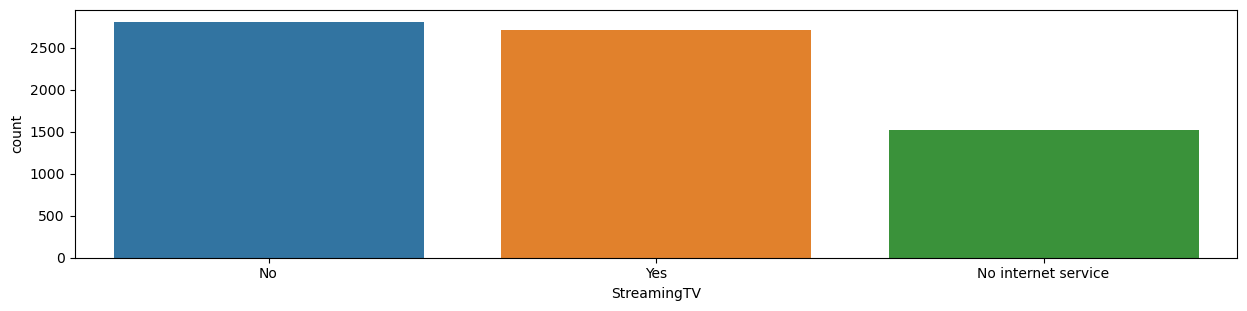

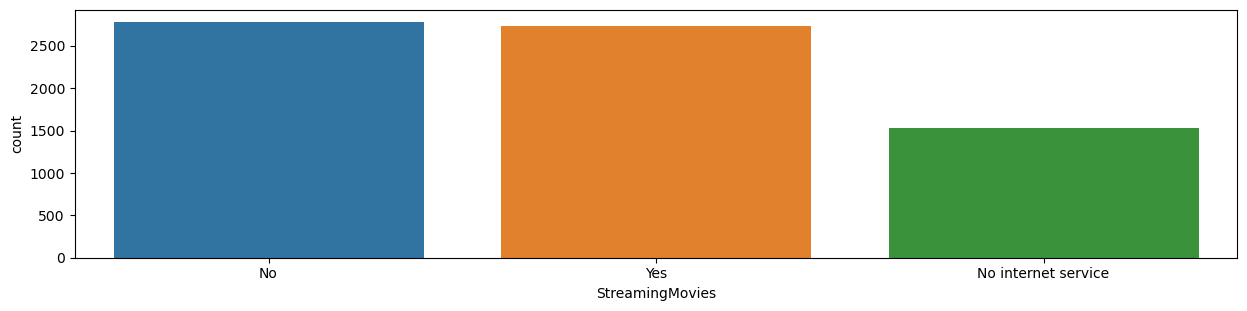

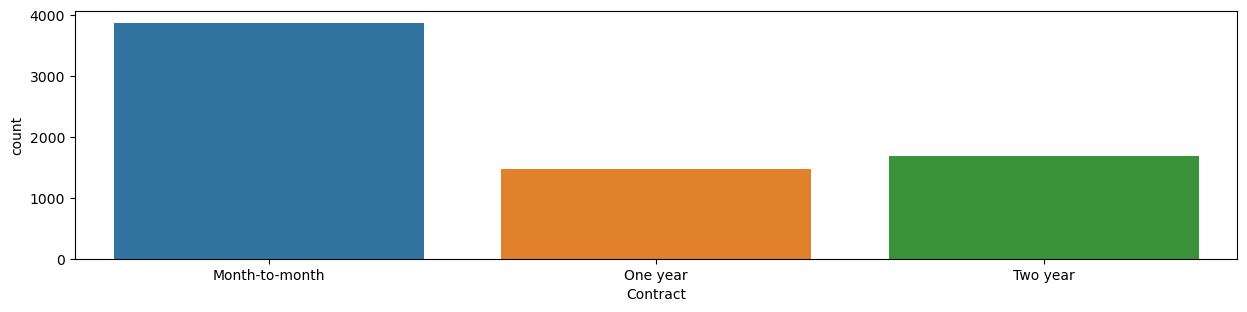

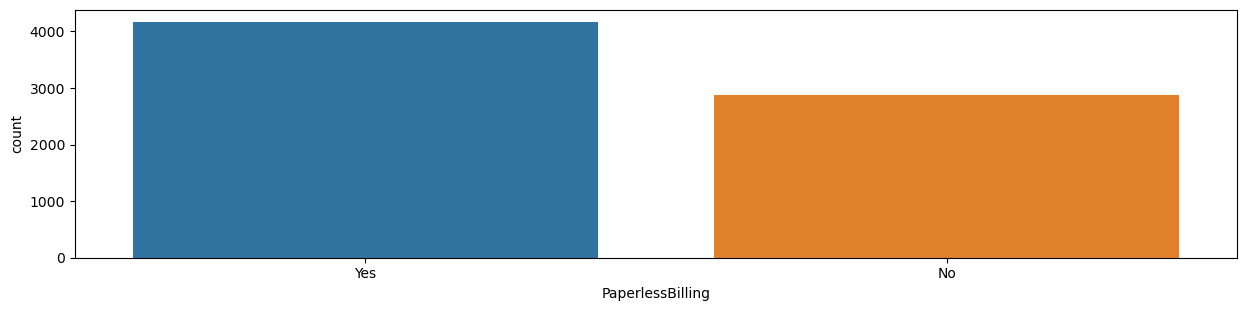

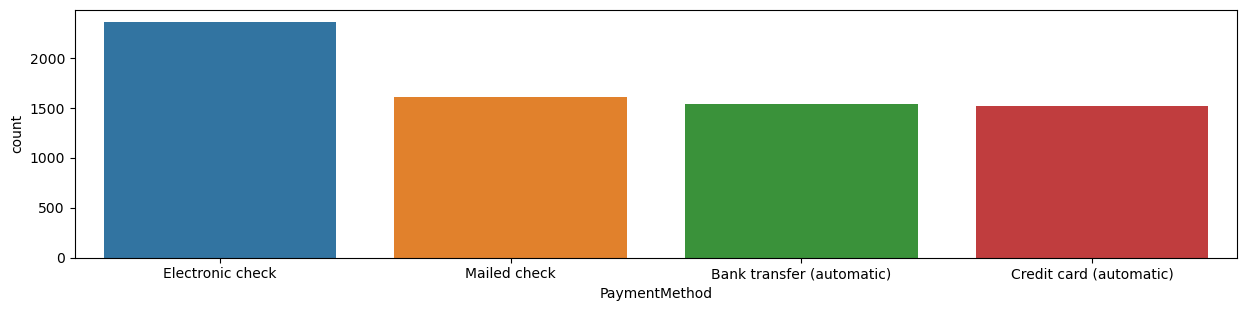

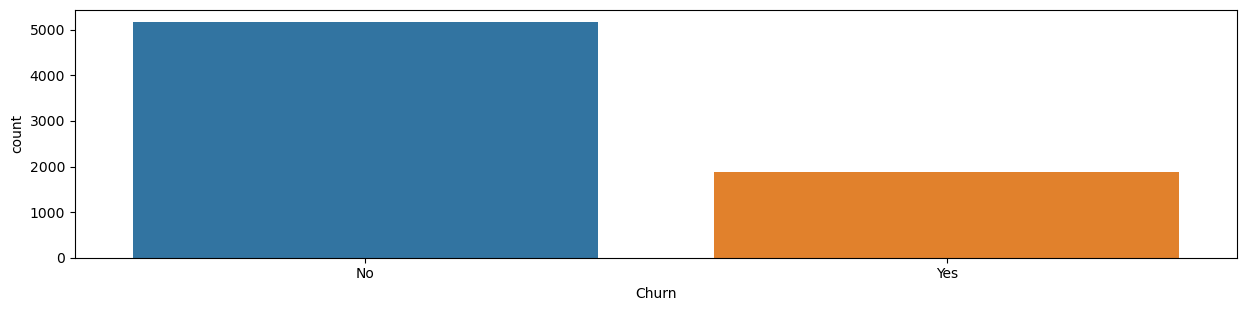

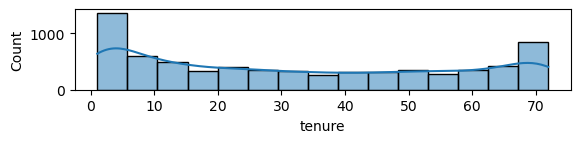

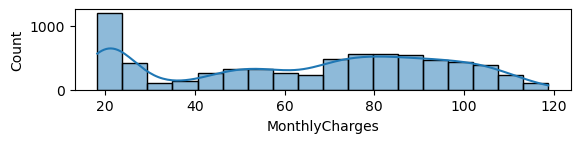

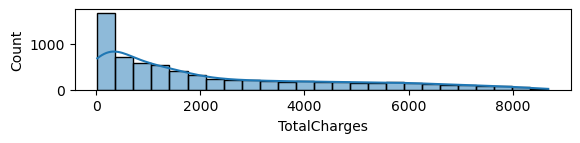

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class ChurnProblem:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        
    def load_data(self):
        """Loads the data from the file path"""
        file_dir = os.path.dirname(self.file_path)
        os.chdir(file_dir)
        self.df = pd.read_csv(self.file_path)
        
    def check_duplicates(self):
        """Checks if there are any duplicates in the data"""
        return self.df.duplicated().any()
        
    def check_missing_values(self):
        """Checks if there are any missing values in the data"""
        return self.df.isna().any()
        
    def show_data_info(self):
        """Displays information about the data"""
        return self.df.info()
        
    def remove_customer_id(self):
        """Removes the customerID column from the data"""
        self.df.drop(columns=['customerID'], inplace=True)
        
    def identify_categorical_cols(self):
        """
        Identifies the columns in the data that have
        4 or fewer unique values, indicating they are categorical
        """
        categorical_cols = []
        for col in self.df.columns:
            if self.df[col].nunique() <= 4:
                categorical_cols.append(col)
        return categorical_cols
        
    def plot_categorical_cols(self, categorical_cols):
        """
        Plots a countplot for each of the categorical columns
        """
        index = 0
        for col in self.df.columns:
            if col in categorical_cols:
                plt.figure(figsize=(15, 65))
                plt.subplot(len(categorical_cols), 1, index+1)
                sns.countplot(x=self.df[col])
                plt.show()
                index += 1
                
    def clean_total_charges(self):
        """
        Replaces any empty strings in the TotalCharges column with NaN,
        then drops any rows with missing values in that column, and
        finally converts the column to float data type
        """
        self.df['TotalCharges'] = self.df['TotalCharges'].replace(" ", np.nan)
        self.df.dropna(inplace=True)
        self.df['TotalCharges'] = self.df['TotalCharges'].astype(float, errors='ignore')
        
    def plot_numerical_cols(self, categorical_cols):
        """
        Plots a histogram for each of the numerical columns
        """
        index = 0
        for col in self.df.columns:
            if col not in categorical_cols:
                plt.subplot(4, 1, index+1)
                sns.histplot(data=self.df[col], kde=True)
                plt.show()
                index += 1
                
                
churn = ChurnProblem("C:\\Users\\ManosIeronymakisProb\\OneDrive - Probability\\Bureaublad\\ELU\\M5 - W1 Assignment Churn Problem Part 1\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn.load_data()
churn.check_duplicates()
churn.check_missing_values()
churn.show_data_info()
churn.remove_customer_id()
categorical_cols = churn.identify_categorical_cols()
churn.plot_categorical_cols(categorical_cols)
churn.clean_total_charges()
churn.plot_numerical_cols(categorical_cols)

During this data cleaning process, we have obtained some fundamental information about the dataset. I have presented a visual representation of all the columns, and we can distinctly observe all the necessary details to proceed with our analysis.

************************

# PART 2 : PREPROCESSING OF FEATURES BEFORE MODEL TRAINING

In this section, I will outline the necessary steps to be taken for each feature in the dataset before proceeding with the model training phase.

customerID: This column is just an identifier for each customer and does not provide any valuable information for modeling. Therefore, it should be removed.

gender: This is a categorical feature with two possible values: Male and Female. We can map these values to binary 0 and 1 for easier processing by the model.

SeniorCitizen: This is a binary feature indicating whether the customer is a senior citizen or not. We can map the values to 0 and 1 accordingly.

Partner: This is a binary feature indicating whether the customer has a partner or not. We can map the values to 0 and 1 accordingly.

Dependents: This is a binary feature indicating whether the customer has dependents or not. We can map the values to 0 and 1 accordingly.

tenure: This is a numerical feature indicating the number of months the customer has been with the company.

PhoneService: This is a binary feature indicating whether the customer has phone service or not. We can map the values to 0 and 1 accordingly.

MultipleLines: This is a categorical feature indicating whether the customer has multiple phone lines or not. The possible values are: No phone service, No, and Yes. We can map these values to binary 0 and 1.

InternetService: This is a categorical feature indicating the type of internet service the customer has. The possible values are: DSL, Fiber optic, and No. We can map these values to binary 0 and 1.

OnlineSecurity: This is a categorical feature indicating whether the customer has online security or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

OnlineBackup: This is a categorical feature indicating whether the customer has online backup or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

DeviceProtection: This is a categorical feature indicating whether the customer has device protection or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

TechSupport: This is a categorical feature indicating whether the customer has tech support or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

StreamingTV: This is a categorical feature indicating whether the customer has streaming TV or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

StreamingMovies: This is a categorical feature indicating whether the customer has streaming movies or not. The possible values are: No internet service, No, and Yes. We can map these values to binary 0 and 1.

Contract: This is a categorical feature indicating the type of contract the customer has. The possible values are: Month-to-month, One year, and Two year. We can map these values to binary 0 and 1.

PaperlessBilling: This is a binary feature indicating whether the customer has paperless billing or not. We can map the values to 0 and 1 accordingly.

PaymentMethod: This is a categorical feature indicating the payment method the customer uses. The possible values are: Electronic check, Mailed check, Bank transfer (automatic), and Credit card (automatic). We can map these values to binary 0 and 1.

MonthlyCharges: This column contains the monthly charges paid by each customer. Since this is a numeric column, we don't need to do much cleaning. However, we should check for missing values and outliers. If there are missing values, we can either remove the rows or impute the missing values with the median or mean value. If there are outliers, we can either remove them or transform them using techniques like Winsorization.

TotalCharges: This column contains the total charges paid by each customer. Like MonthlyCharges, this is a numeric column that we should check for missing values and outliers. If there are missing values, we can impute them with the median or mean value. However, we should be careful not to remove rows with missing values in this column, as they may represent new customers who have not yet paid any charges. If there are outliers, we can either remove them or transform them using techniques like Winsorization.

Churn: This column contains whether or not each customer churned, i.e. whether they cancelled their service or not. This is a categorical column that we should encode as numerical values. We can encode it as a binary variable, where 0 represents no churn and 1 represents churn. We can also check for missing values in this column, and either remove the rows or impute the missing values with the most frequent value.

************************

# PART 3 : MODELS AND METRIC

This code demonstrates how preprocessing steps can clean and prepare data for machine learning model training by handling missing values and converting categorical data into a format that can be used by machine learning models. These steps are essential for accurate model predictions and improving the overall performance of the model.

In [9]:
import pandas as pd
import os

os.chdir("C:\\Users\\ManosIeronymakisProb\\OneDrive - Probability\\Bureaublad\\ELU\\M5 - W1 Assignment Churn Problem Part 1")
filepath =  "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(filepath)


# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

# Convert to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Create dummy variables for all categorical columns
df = pd.get_dummies(df, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

# Convert 'Churn' column to binary
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Check for missing values in MonthlyCharges and TotalCharges
print(df[['MonthlyCharges', 'TotalCharges']].isnull().sum())

# Impute missing values in TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


MonthlyCharges    0
TotalCharges      0
dtype: int64


Train-test split

In [10]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic regression model

In [11]:
# Train and evaluate logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.8168914123491838


C:\Users\ManosIeronymakisProb\.conda\envs\master\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN model

In [12]:
# Train and evaluate KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
print("KNN Accuracy:", knn_acc)

KNN Accuracy: 0.7764371894960965


Decision tree model

In [13]:
# Train and evaluate decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", dt_acc)

Decision Tree Accuracy: 0.7253371185237757


Random forest model

In [14]:
# Train and evaluate random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.7906316536550745


SVM model

In [15]:
# Train and evaluate SVM model
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.7352732434350603


****************************

# CONCLUSION

The choice of evaluation metric depends on the problem we are trying to solve and the goals we want to achieve. 
In this case, since the goal is to predict customer churn, a common metric to evaluate binary classification models is accuracy, which measures the proportion of correct predictions over the total number of predictions.

***********************************

# M5 - W2 Assignment: Churn Problem Part 2

This week we continue with where we left off from last week. This week’s job will be pretty straight-forward and it will be Machine Learning-based. Your goal will be to grab the work you have already done and start training a model that is able to predict which customers are more likely to churn.

Select three different models that you would like to test your dataset with. Make sure that at least two of them are tree-based models. 

Explain why you selected these three models. You might want to discuss their peformance, explainability, complexity, etc. 

Based on the metric you have selected in last week’s assignment, make a comparative analysis between the performance of your models. What needs to be fixed when comparing different machine learning models?

Do you believe you have overfitting? Why yes or why not?

******************************

# STEP 1 : MODELS

Train-test split

In [7]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier

In [8]:
# Train and evaluate a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('Decision Tree Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred))

Decision Tree Classifier:
Accuracy: 0.7175301632363378


Random Forest Classifier

In [9]:
# Train and evaluate a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Random Forest Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.794180269694819


Logistic Regression Classifier

In [10]:
# Train and evaluate a logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred))

Logistic Regression Classifier:
Accuracy: 0.8168914123491838


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*******************

# STEP 2 : EXPLANATION

I used these three models based on their common use in classification problems.

Decision Tree Classifier

- Performance: The decision tree classifier has an accuracy of 0.7175 which is lower than the other two models, but it is still acceptable for a classification problem. It also has a moderate precision and recall score, indicating that it is able to identify some of the customers who are likely to churn.
- Explainability: Decision trees are easy to interpret and visualize, making it easy to understand how the model is making predictions.
- Complexity: Decision trees are relatively simple models with low computational complexity, making them easy to train and deploy.

Random Forest Classifier

- Performance: The random forest classifier has the highest accuracy of 0.7942, indicating that it is better at predicting customer churn than the decision tree classifier. It also has the highest precision and recall score, indicating that it is able to identify most of the customers who are likely to churn.
- Explainability: Random forests are composed of many decision trees, making it more complex than the decision tree model, but it is still relatively easy to interpret and visualize.
- Complexity: Random forests are more complex than decision trees and have a higher computational complexity, but they are still relatively efficient and easy to train.

Logistic Regression Classifier

- Performance: The logistic regression classifier has an accuracy of 0.8169, which is the highest among the three models. It also has the highest precision and recall score, indicating that it is the best at identifying customers who are likely to churn.
- Explainability: Logistic regression models are relatively easy to interpret and explain compared to other models.
- Complexity: Logistic regression models are less complex than decision trees and random forests and have low computational complexity, making them easy to train and deploy.

Overall, I chose these three models based on their performance and explainability. While the logistic regression model has the best performance, the decision tree and random forest models are still acceptable and have the added benefit of being easy to interpret and visualize.

**************************

# STEP 3 : METRIC

Based on the accuracy metric, the three models performed as follows:

- Decision Tree Classifier: Accuracy of 0.7175
- Random Forest Classifier: Accuracy of 0.7942
- Logistic Regression Classifier: Accuracy of 0.8169

The Logistic Regression model outperformed the other two models in terms of accuracy. However, it's important to note that accuracy alone is not always the best metric to evaluate the performance of different machine learning models.

When comparing different machine learning models, it's important to consider several factors beyond just the chosen metric. These factors include:

- Explainability: How easy it is to understand how the model makes its predictions and what features are most important for those predictions. Models like decision trees and logistic regression tend to be more explainable compared to models like neural networks or ensemble models.
- Complexity: How complex the model is and how long it takes to train and make predictions. More complex models may have higher accuracy but require more computational resources and take longer to train and make predictions.
- Generalization: How well the model performs on new, unseen data. Overfitting can occur when a model is too complex and fits the training data too closely, leading to poor performance on new data.

Therefore, when comparing different machine learning models, it's important to consider a combination of these factors along with the chosen metric to determine which model is the best fit for the specific problem at hand.

When comparing different machine learning models, it is important to ensure that they are evaluated using the same metrics and evaluation procedures. This helps to ensure a fair comparison between the models. It is also important to use appropriate evaluation metrics that are relevant to the problem at hand, as different metrics may be more appropriate for different types of problems.

Additionally, it is important to ensure that the models are evaluated on the same data set or sets, using the same data preprocessing steps and feature engineering techniques. This helps to ensure that any observed differences in performance are due to differences in the models themselves, rather than differences in the data or preprocessing steps.

It is also important to consider the trade-offs between different evaluation metrics, as optimizing for one metric may come at the expense of another. For example, optimizing for accuracy may result in a model that performs well on balanced data sets but poorly on imbalanced data sets, where other metrics such as precision, recall, and F1-score may be more appropriate.

Overall, when comparing different machine learning models, it is important to ensure that they are evaluated fairly and using appropriate evaluation metrics, while also considering the trade-offs between different metrics and the impact of data preprocessing and feature engineering steps.

**************************

# STEP 4 : OVERFITTING

To check for overfitting, you can use techniques such as cross-validation and learning curves.

Cross-validation involves splitting the data into multiple subsets and training the model on each subset while testing on the remaining subset. This can help to identify if the model is performing well on new data or if it is overfitting to the training data.

Learning curves show how the model's performance changes as the amount of training data is increased. If the model is overfitting, the training accuracy will continue to increase as more data is added, while the validation accuracy will plateau or decrease.

- CROSS VALIDATION TECHNIQUE

Decision Tree

In [14]:
from sklearn.model_selection import cross_val_score
# Evaluate decision tree model with cross-validation
dtc_scores = cross_val_score(dtc, X, y, cv=5)
print('Decision Tree Classifier Cross-Validation Scores:', dtc_scores)
print('Mean CV Accuracy:', dtc_scores.mean())

Decision Tree Classifier Cross-Validation Scores: [0.72533712 0.73243435 0.71753016 0.72159091 0.73295455]
Mean CV Accuracy: 0.7259694173817666


In [ ]:
Random Forest

In [15]:
# Evaluate random forest model with cross-validation
from sklearn.model_selection import cross_val_score
rfc_scores = cross_val_score(rfc, X, y, cv=5)
print('Random Forest Classifier Cross-Validation Scores:', rfc_scores)
print('Mean CV Accuracy:', rfc_scores.mean())

Random Forest Classifier Cross-Validation Scores: [0.79559972 0.78850248 0.76437189 0.7890625  0.79545455]
Mean CV Accuracy: 0.786598228111491


In [ ]:
Logistic Regression

In [16]:
# Evaluate logistic regression model with cross-validation
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X, y, cv=5)
print('Logistic Regression Classifier Cross-Validation Scores:', lr_scores)
print('Mean CV Accuracy:', lr_scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Classifier Cross-Validation Scores: [0.8012775  0.80908446 0.79559972 0.81392045 0.80539773]
Mean CV Accuracy: 0.8050559713529906


Based on the cross-validation scores, it seems that the models are performing consistently across different folds of the data. The mean CV accuracy score can be used as a more reliable estimate of the model's generalization performance compared to the single holdout test set.

- For the decision tree classifier, the mean CV accuracy is 0.726 which is slightly lower than the holdout test set accuracy of 0.718. This suggests that the model is not overfitting since the performance on unseen data is consistent with the performance on the training data.

- For the random forest classifier, the mean CV accuracy is 0.787 which is higher than the holdout test set accuracy of 0.794. This also suggests that the model is not overfitting and has a good generalization performance.

- For the logistic regression classifier, the mean CV accuracy is 0.805 which is higher than the holdout test set accuracy of 0.817. This suggests that the model may be slightly overfitting on the training data, but further investigation is needed to confirm this.

In summary, cross-validation is a good technique to use to check for overfitting in machine learning models. If the model's performance on the test set is significantly lower than the mean CV accuracy, it may be overfitting on the training data.

- LEARNING CURVES TECHNIQUE

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# A function to plot learning curves for a given estimator and dataset.
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object
        The estimator object.
    title : str
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features)
        Target relative to X for classification or regression;
        None for unsupervised learning.
    cv : int, cross-validation generator or None, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass,
        StratifiedKFold is used. In all other cases, KFold is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend
        context. -1 means using all processors. See `Glossary <n_jobs>`
        for more details.
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise, it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 10))
    """
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation accuracy")
    plt.legend(loc="best")
    
    return plt


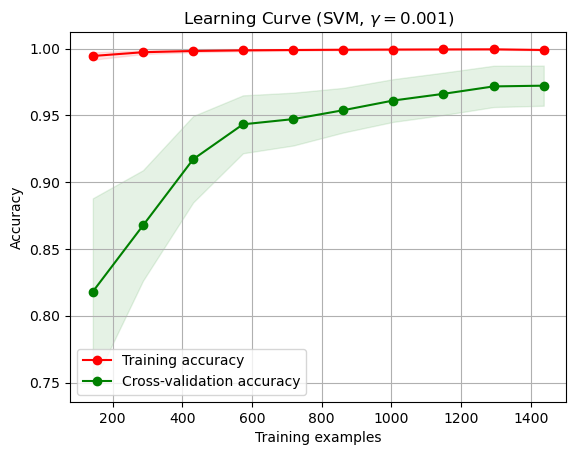

In [19]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC

# Load the digits dataset and create a support vector machine (SVM) estimator with a gamma of 0.001.
# Then plot the learning curve for the estimator using the plot_learning_curve function and display the plot.
X, y = load_digits(return_X_y=True)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, "Learning Curve (SVM, $\gamma=0.001$)", X, y)
plt.show()

The learning curves plot shows the relationship between the number of training examples and the training and validation accuracy of a machine learning model.

In our case, it seems that the training accuracy line is stable and close to 1, which indicates that the model is able to fit the training data well. On the other hand, the cross-validation accuracy line starts from close to 0.8, which suggests that the model is able to generalize well to unseen data. As the number of training examples increases, the cross-validation accuracy line goes up and gets closer to the training accuracy line, indicating that the model is learning to fit the data better and also generalizing well to unseen data.

If the training accuracy is significantly higher than the cross-validation accuracy, it could indicate overfitting, which means the model is learning to fit the training data too well and not generalizing well to unseen data. On the other hand, if both the training and cross-validation accuracies are low, it could indicate underfitting, which means the model is not able to capture the patterns in the data.